# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah Stroke Prediction Dataset, yang diperoleh dari Kaggle, sebuah platform public repository terpercaya untuk data science dan machine learning.

1. **Sumber Dataset**:  
   Dataset yang digunakan dalam proyek ini diperoleh dari Kaggle, sebuah platform public repository yang menyediakan berbagai dataset untuk keperluan data science dan machine learning. Dataset ini bersifat terbuka dan dapat diakses secara bebas oleh publik, sehingga sesuai dengan ketentuan penggunaan sumber data dari platform repositori publik.

    Link Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. **Deskripsi Dataset**:  
   Dataset ini berisi informasi pasien yang meliputi usia, jenis kelamin, kondisi kesehatan (seperti tekanan darah tinggi dan penyakit jantung), serta faktor gaya hidup seperti status merokok dan jenis pekerjaan.
   - id - ID unik tiap pasien
   - gender - Jenis kelamin: Male, Female, Other
   - age - Usia dalam tahun
   - hypertension - 1 jika pasien hipertensi
   - heart_disease - 1 jika pasien memiliki penyakit jantung
   - ever_married - Status pernikahan
   - work_type - 	Jenis pekerjaan pasien
   - Residence_type - Tinggal di daerah urban atau rural
   - avg_glucose_level - Rata-rata kadar glukosa darah
   - bmi - 	Indeks Massa Tubuh (BMI)
   - smoking_status - 	Status merokok pasien
   - stroke - 1 jika pasien pernah mengalami stroke

# **2. Import Library**

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [2]:
# Load Dataset
df = pd.read_csv('data.csv',delimiter=',')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan deskripsi data frame
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [4]:
# Melihat dimensi dataset
df.shape

(5110, 12)

In [5]:
# Mengecek tipe data fitur
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [6]:
for col in df.columns:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: id
[ 9046 51676 31112 ... 19723 37544 44679]
----------------------------------------
Kolom: gender
['Male' 'Female' 'Other']
----------------------------------------
Kolom: age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.

In [7]:
# Hitung jumlah nilai unik
df.nunique()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


In [8]:
# Mengecek missing value
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


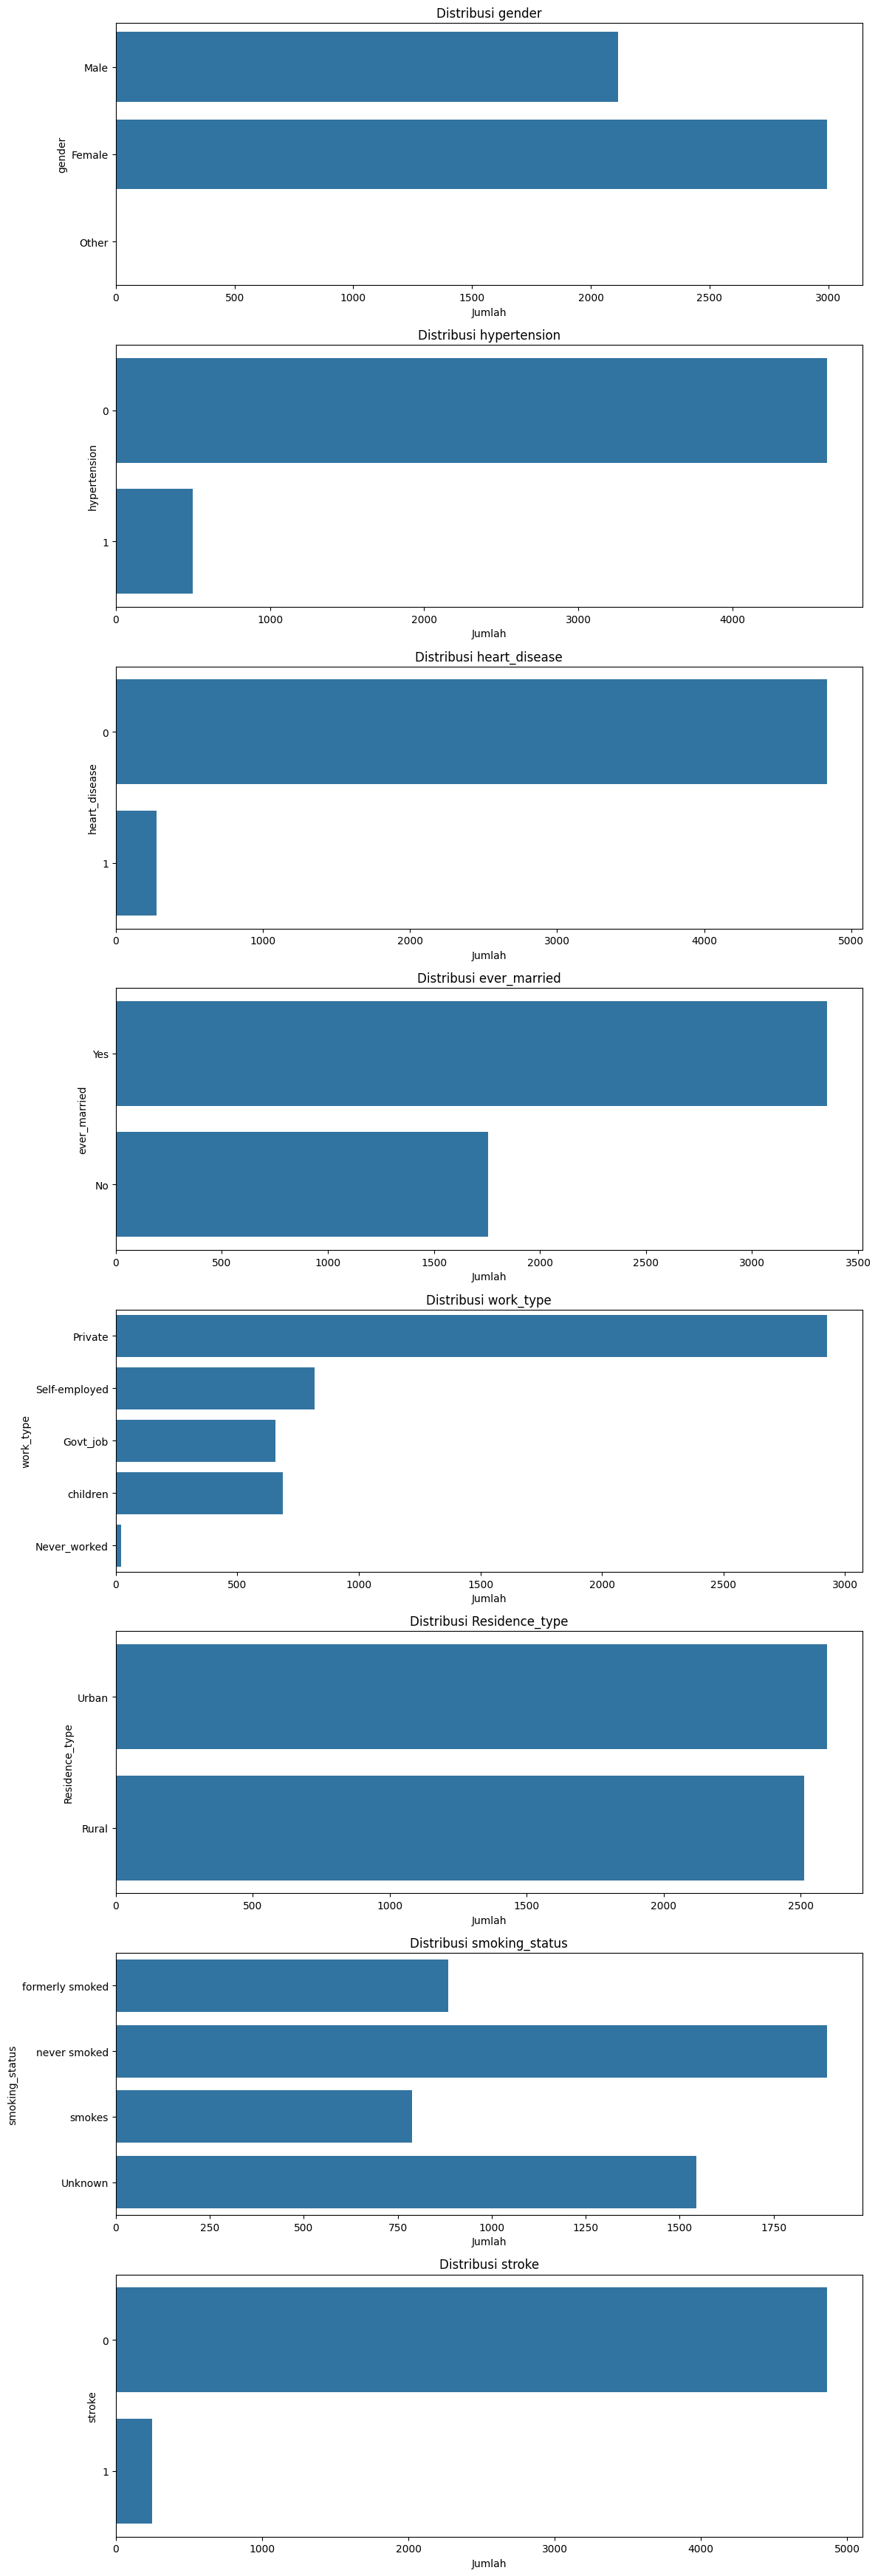

In [9]:
# Visualisasi distribusi data kategorikal
categorical_columns = [
    'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'
]

fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(12, 35))

for i, feature in enumerate(categorical_columns):
    sns.countplot(data=df, y=feature, ax=ax[i])
    ax[i].set_title(f'Distribusi {feature}')
    ax[i].set_xlabel('Jumlah')
    ax[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

### Penjelasan Visualisasi
1. **Distribusi gender**
  - Mayoritas pasien adalah perempuan, diikuti oleh laki-laki.
  - Ada sedikit data dengan label "Other" — jumlahnya sangat kecil dan bisa dipertimbangkan untuk dihapus.
2. **Distribusi hypertension**
  - Sekitar 90% pasien tidak memiliki hipertensi.
  - Hanya sekitar 10% pasien memiliki hipertensi (label 1).
3. **Distribusi heart_disease**
  - Mayoritas besar pasien tidak memiliki penyakit jantung.
  - Pasien dengan penyakit jantung sekitar 5-6% dari total data.
4. **Distribusi ever_married**
  - Lebih dari 65% pasien sudah menikah (Yes).
  - Sisanya belum menikah — ini bisa relevan terhadap risiko stroke.
5. **Distribusi work_type**
  - Paling banyak: Private.
  - Diikuti oleh Self-employed, Govt_job, dan beberapa kategori seperti Children dan Never_worked.
  - Perlu OneHotEncoding karena multi-kategori.
6. **Distribusi Residence_type**
  - Data cukup seimbang antara Urban dan Rural.
  - Cocok untuk langsung diubah ke format biner: Urban = 1, Rural = 0.
7. **Distribusi smoking_status**
  - Kategori paling umum: Never smoked.
  - Diikuti oleh Unknown, formerly smoked, dan smokes.
  - Perlu OneHotEncoding.
8. **Distribusi stroke (target)**
  - Data sangat imbalanced:
    - Mayoritas besar pasien tidak mengalami stroke (0).
    - Pasien yang mengalami stroke (1) sangat sedikit (sekitar 5%).
  - Perlu menangani imbalance ini saat training model.

In [10]:
# Daftar kolom numerik
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Menampilkan jumlah kemunculan tiap nilai unik di setiap kolom numerik
for col in numerical_columns:
    print(f"\nValue counts untuk kolom: {col}")
    print(df[col].value_counts())


Value counts untuk kolom: age
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64

Value counts untuk kolom: avg_glucose_level
avg_glucose_level
93.88     6
73.00     5
72.49     5
91.85     5
91.68     5
         ..
61.98     1
91.01     1
120.03    1
138.51    1
118.41    1
Name: count, Length: 3979, dtype: int64

Value counts untuk kolom: bmi
bmi
28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
47.9     1
13.0     1
13.9     1
54.1     1
14.9     1
Name: count, Length: 418, dtype: int64


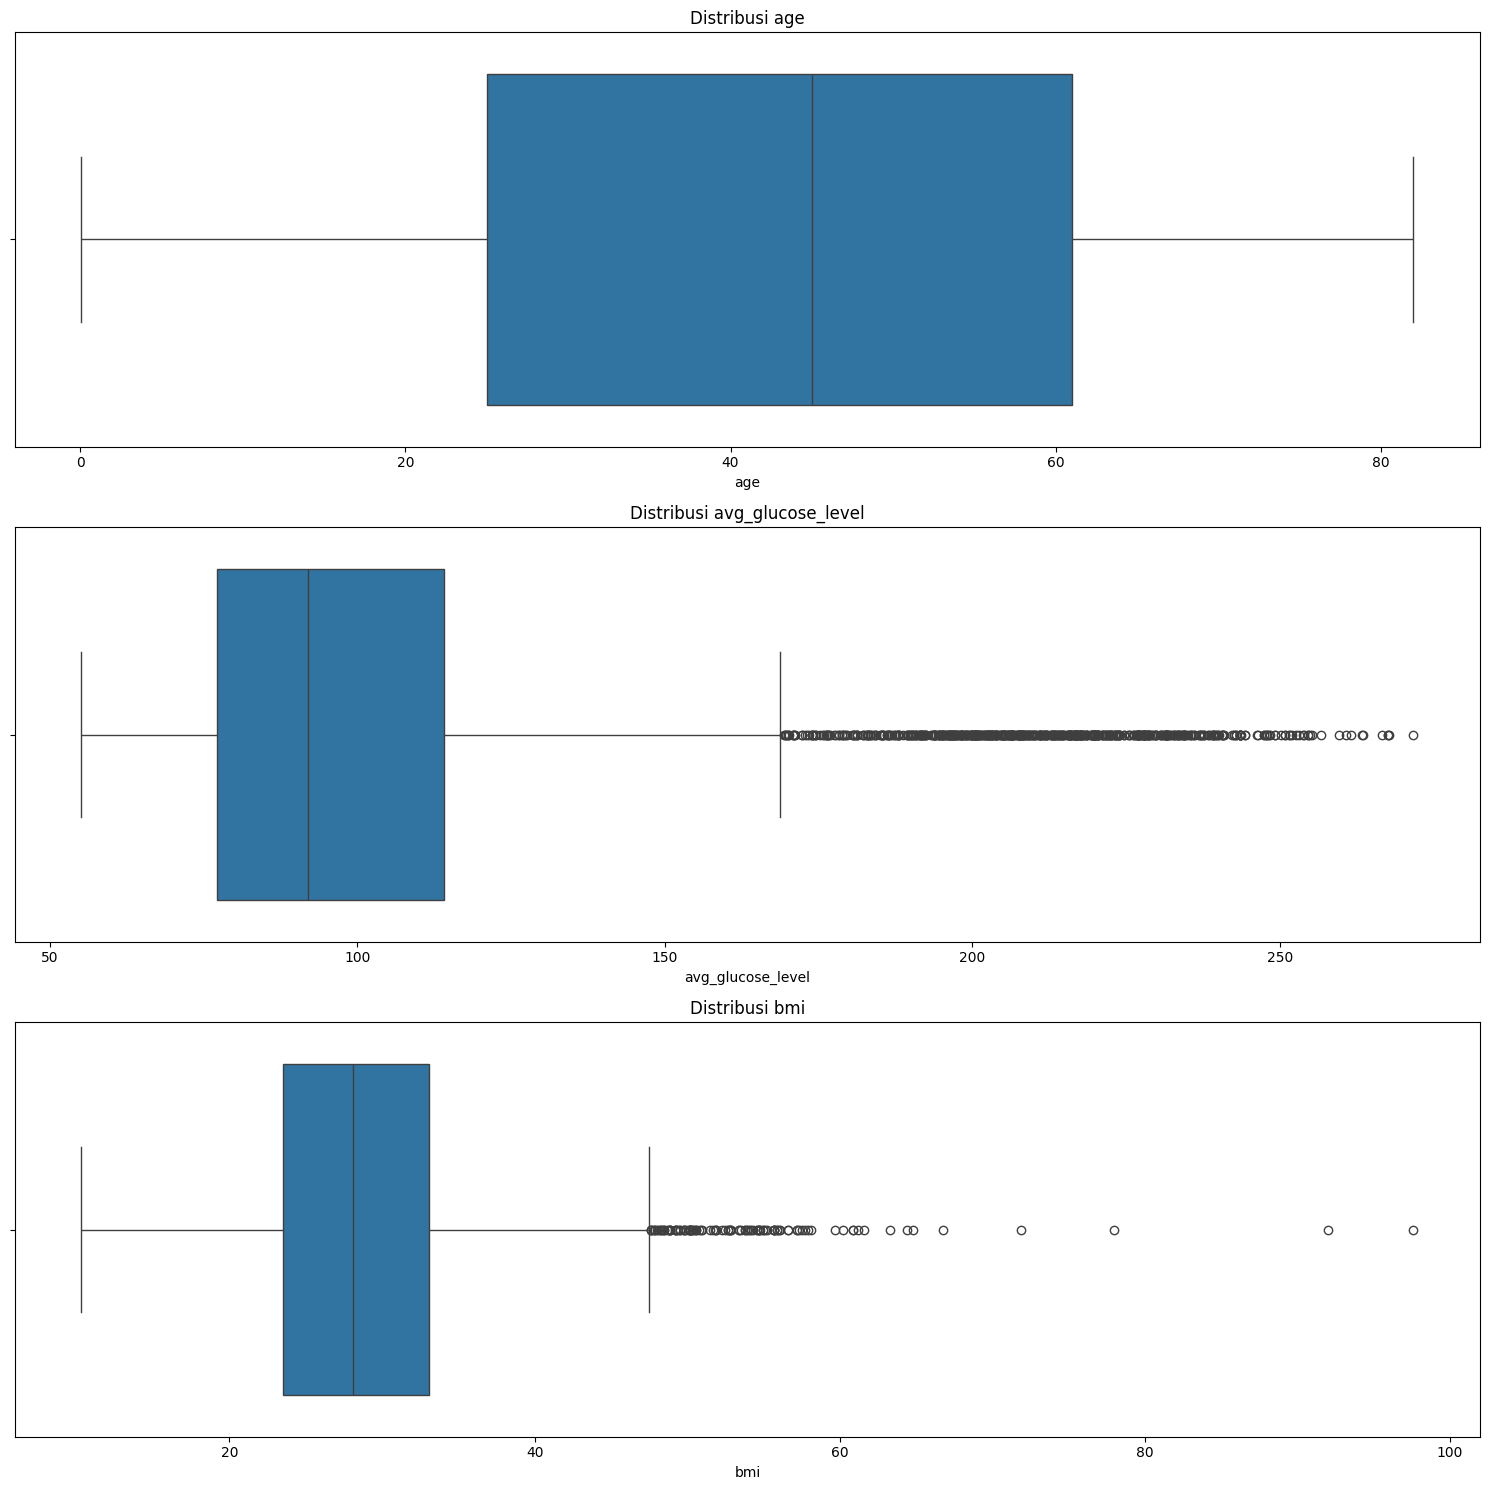

In [11]:
# Memvisualisasikan distribusi fitur numerik
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(15, max(5 * len(features), 10)))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
        ax[i].set_title(f'Distribusi {feature}')
    plt.tight_layout()
    plt.show()

# Jalankan visualisasi
numerical_dis_plot(
    features=numerical_columns,
    df=df
    )

### Penjelasan Visualisasi
1. **Distribusi age**
  - Sebaran usia cukup luas, mulai dari 0 hingga lebih dari 80 tahun.
  - Tidak ada outlier signifikan.
  - Median usia sekitar 45 tahun — ini menunjukkan setengah dari pasien berusia di bawah 45 tahun.
  - Distribusinya relatif simetris, artinya tidak terlalu skewed.

2. **Distribusi avg_glucose_level**
  - Terdapat banyak outlier di atas nilai 150.
  - Median berada di sekitar 90-100.
  - Distribusi sangat right-skewed — banyak pasien dengan kadar gula darah tinggi yang ekstrem (hingga hampir 300).

3. **Distribusi bmi**
  - Median BMI berada sekitar 27-28.
  - Ada cukup banyak outlier BMI tinggi, bahkan di atas 60 hingga mendekati 100.
  - Sebagian besar data berada di rentang 15–40, yang masih tergolong normal sampai obesitas ringan.

# **5. Data Preprocessing**

In [15]:
# Drop kolom ID karena tidak relevan
df = df.drop(columns=['id'], errors='ignore')

In [16]:
# Mengisi data kosong pada kolom bmi menggunakan median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

/tmp/ipython-input-16-993009716.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [17]:
# Mapping kolom biner
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0}).astype('int')
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0}).astype('int')

In [22]:
# Mapping kolom gender
df = df[df['gender'] != 'Other']  # Buang nilai langka
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

/tmp/ipython-input-22-2642297103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [18]:
# Melakukan OneHotEncoder pada kolom multi-kelas
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

In [19]:
# Tangani outlier / skewed numeric
df['avg_glucose_level'] = np.log1p(df['avg_glucose_level'])

In [20]:
scaler = StandardScaler()
df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])

In [27]:
# Konversi boolean ke integer
bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   Residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   work_type_Never_worked          5109 non-null   int64  
 10  work_type_Private               5109 non-null   int64  
 11  work_type_Self-employed         5109 non-null   int64  
 12  work_type_children              5109 no

In [29]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.051434,0,1,1,1,5.436731,1.005086,1,0,1,0,0,1,0,0
1,0,0.786070,0,0,1,0,5.314240,-0.098981,1,0,0,1,0,0,1,0
2,1,1.626390,0,1,1,0,4.672081,0.472536,1,0,1,0,0,0,1,0
3,0,0.255342,0,0,1,1,5.148831,0.719327,1,0,1,0,0,0,0,1
4,0,1.582163,1,0,1,0,5.165471,-0.631531,1,0,0,1,0,0,1,0
5,1,1.670617,0,0,1,1,5.232231,0.017920,1,0,1,0,0,1,0,0
6,1,1.361026,1,1,1,0,4.263947,-0.189904,1,0,1,0,0,0,1,0
7,0,1.139889,0,0,0,1,4.557974,-0.787399,1,0,1,0,0,0,1,0
8,0,0.697615,0,0,1,0,4.345752,-0.098981,1,0,1,0,0,0,0,0
9,0,1.537935,0,0,1,1,4.087152,-0.605553,1,0,1,0,0,0,0,0


# Mengunduh Dataset

In [30]:
df.to_csv('data_preprocessing.csv', index=False)